In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import numpy as np

In [2]:
cleaned_df = pd.read_csv('../data/cleaned_tweet_data.csv')
cleaned_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"['Pelosi', 'Taiwan', 'NATO', '5G']",Flightradar24,Algérie,airplane landed safely in 🇹🇼 \r\n1 both 🇨🇳...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"['Pelosi', 'マツコの知らない世界', 'Yediiklim', 'BadDeci...",Reno Omokri,NaN,watch the video of the beginning of the chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \r\n#Taipei \r\n#taiwan\r\n#XiJinping ...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...",Peter Obi,Algérie,\r\n \r\n\r\n \r\n \r\non a verge of another ...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...",BBC News (World),Chlef,strong ✍️💜
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\r\n#china\r\nChina Time ✌️ https://t.c...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"['Pelosi', 'china']",Nancy Pelosi,Algérie,\r\n\r\nchina time ✌️


In [3]:
# useful functions

# a definition to categorize the texts
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "neutral"
    else:
        return "negative"

# a def to remove neutral values
def remove_neutrals(value):
    return value != "neutral"


### Let's interprete the polarity of each tweet

In [4]:
cleaned_df['polarity'] = cleaned_df['polarity'].apply(pd.to_numeric)
cleaned_df['score'] = cleaned_df['polarity'].apply(text_category)
cleaned_df['score'].value_counts()

positive    7866
neutral     7491
negative    2496
Name: score, dtype: int64

 <b>Sentiment Analysis :</b>identify and extract information.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

Visualize tweets' score

<AxesSubplot:>

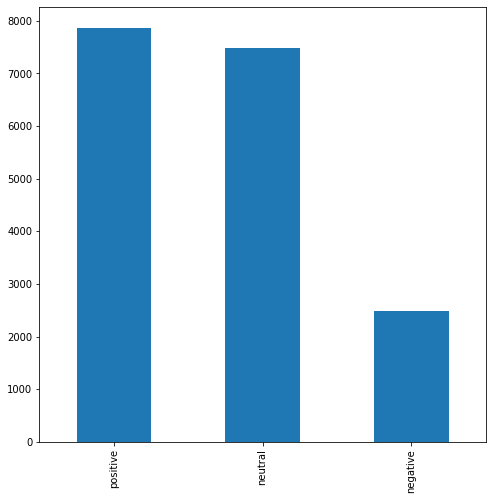

In [21]:
score_count =  cleaned_df['score'].value_counts()
score_count.plot(kind="bar", figsize=[8, 8])

convert to root form

In [7]:
stemmer = PorterStemmer()
def stem_word(text: str) -> str:
    
    stemmed_words = []
    sent_list = text.split()
    
    for word in sent_list:
        try:
            stemmed_words.append(stemmer.stem(word)) 
        except:
             stemmed_words.append(word)
    return ' '.join(stemmed_words)

In [12]:
cleanedTweet[['score','clean_text']][:5]

,score,clean_text
0,1,airplan land safe in 🇹🇼 1 both 🇨🇳 amp 🇺🇸 are p...
3,1,strong ✍️💜
5,1,v382 intro logo anim blue smoke 💙 if you are l...
7,0,when your miss her but she far
9,1,twitter will make laugh and scare on the taiwa...


In [14]:
(X, y) = cleanedTweet['clean_text'], cleanedTweet['score']
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_vectorizer.fit(X.values)

CountVectorizer(ngram_range=(3, 3))

In [15]:
X_trigram = trigram_vectorizer.transform(X.values)

In [16]:
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer()

In [17]:
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)

### Training

In [20]:
# we are going to use 80/20 train to validation split
def train_and_show_scores(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

In [22]:
train_and_show_scores(X_trigram, y, title="trigram")

trigram
Train score: 1.0 ; Validation score: 0.97



In [23]:
train_and_show_scores(X_train_tf_idf, y, title="trigram_tf_idf")

trigram_tf_idf
Train score: 1.0 ; Validation score: 0.97



We have compared the two vectorizers and find same result

## Topic Modeling

In [24]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

In [25]:

class LoadData:
  def __init__(self,dir_name,file_name):
    self.dir_name=dir_name
    self.file_name = file_name
    
 
  def read_csv(self):
    os.chdir(self.dir_name)
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df

In [29]:
DataLoader_obj= LoadData('../data/','cleaned_tweet_data.csv')
tweets_df = DataLoader_obj.read_csv()
tweets_df=tweets_df.dropna()
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \r\n#Taipei \r\n#taiwan\r\n#XiJinping ...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...",Peter Obi,Algérie,\r\n \r\n\r\n \r\n \r\non a verge of another ...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...",BBC News (World),Chlef,strong ✍️💜
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\r\n#china\r\nChina Time ✌️ https://t.c...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"['Pelosi', 'china']",Nancy Pelosi,Algérie,\r\n\r\nchina time ✌️
5,2022-07-31 13:22:22+00:00,"<a href=""http://twitter.com/download/android"" ...",V382 Intro Logo Animation Blue Smoke 💙\r\n\r\n...,0.169841,0.350397,en,1,1,Yacine_Kelala8,350,1,False,"['YK', 'Taiwan']",AsabariConsultativeCouncil,États-Unis,v382 intro logo animation blue smoke 💙\r\n\r\n...
6,2022-08-07 05:55:54+00:00,"<a href=""http://twitter.com/download/android"" ...","TWINNING FOR ""AFRO IN SPACE""🛰️\r\n""SENORITA"" C...",0.000000,0.000000,en,0,0,drax_africa,559,1280,False,"['fashion', 'Twins', 'models', 'RETWEEET', 'PR...",IBEDC,Zambia,twinning for afro in space🛰️\r\nsenorita count...


In [30]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list)
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]



    
    return word_list, word_to_id, corpus_1

In [31]:
PrepareData_obj=PrepareData(tweets_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

### LDA Model
- explains a set of observations

In [32]:
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [33]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('the', 0.033204746),
   ('to', 0.030932011),
   ('and', 0.021131162),
   ('of', 0.020700047),
   ('is', 0.01802803),
   ('a', 0.014866325),
   ('in', 0.014638147),
   ('all', 0.014048817),
   ('it', 0.011071385),
   ('from', 0.010481984)]),
 (1,
  [('the', 0.054173373),
   ('of', 0.036722384),
   ('in', 0.034282733),
   ('to', 0.028354002),
   ('a', 0.026068024),
   ('and', 0.024069719),
   ('taiwan', 0.01603261),
   ('i', 0.013578276),
   ('my', 0.013406155),
   ('china', 0.010475515)]),
 (2,
  [('for', 0.018958846),
   ('your', 0.0144656),
   ('this', 0.01430711),
   ('a', 0.013722172),
   ('me', 0.013582545),
   ('how', 0.009692196),
   ('ไต้หวัน', 0.009217256),
   ('with', 0.008462897),
   ('and', 0.008378999),
   ('or', 0.007799441)]),
 (3,
  [('you', 0.081694596),
   ('for', 0.07086312),
   ('to', 0.06669416),
   ('we', 0.05915757),
   ('is', 0.056662574),
   ('are', 0.054327007),
   ('where', 0.044013936),
   ('waiting', 0.043477938),
   ('🇨🇳', 0.04271458),
   ('the', 0

In [34]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -6.971519918448742

 Ldamodel Coherence Score/Accuracy on Tweets:  0.4595807402587189
